In [1]:
import numpy as np
import cottoncandy as cc


In [2]:
mvmtArr = np.load("/mnt/data/angelaz2/gpt2_ft/trial6_gpu/hidden_state/layer9/cl10/persuasionmovement.npy")

In [3]:
mvmtArr.shape

(282, 768)

In [4]:
mvmtArr

array([[-2.2431097 , -0.19396478,  0.8805665 , ..., -1.2328415 ,
        -0.876883  , -0.5952837 ],
       [-0.48074925, -0.0930382 , -2.7685862 , ...,  1.7681941 ,
         3.6011057 , -4.691137  ],
       [-2.3098547 , -0.08472389, -5.1019964 , ...,  0.329254  ,
        -0.09635837, -2.381694  ],
       ...,
       [ 3.2474444 , -5.882694  , -6.827715  , ...,  0.7017466 ,
         5.0768013 ,  1.2962576 ],
       [-0.08601546, -2.7912352 , -4.0103254 , ...,  0.47357392,
         1.9973248 ,  1.3792269 ],
       [-0.3424581 , -2.2327535 , -8.314115  , ...,  7.5561895 ,
         7.766153  ,  0.8191269 ]], dtype=float32)

In [6]:
socArr = np.load("/mnt/data/angelaz2/gpt2_ft/trial6_gpu/hidden_state/layer9/cl10/persuasionsocial.npy")

In [7]:
socArr.shape

(181, 768)

# Getting the brain data for Persuasion/coaxing video

In [8]:
from matplotlib.pyplot import figure, cm
from npp import zscore
%matplotlib inline

In [9]:
import nibabel as nib

In [10]:
brainData = []

In [11]:
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/100307/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))

In [12]:
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/100408/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/101006/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/101107/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/101309/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/101410/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/101915/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/102008/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/102311/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))
brainData.append(nib.load("/mnt/data/angelaz2/for_angela/102816/tfMRI_SOCIAL_RL-T1_BOLD.nii.gz"))

In [13]:
import cortex

In [14]:
gm_mask = cortex.db.get_mask("AHfs", "20180816AH-sg")

In [15]:
fulld = np.array([np.array(d.get_fdata().T[:,gm_mask]) for d in brainData])

In [16]:
fulld.shape

(10, 274, 94251)

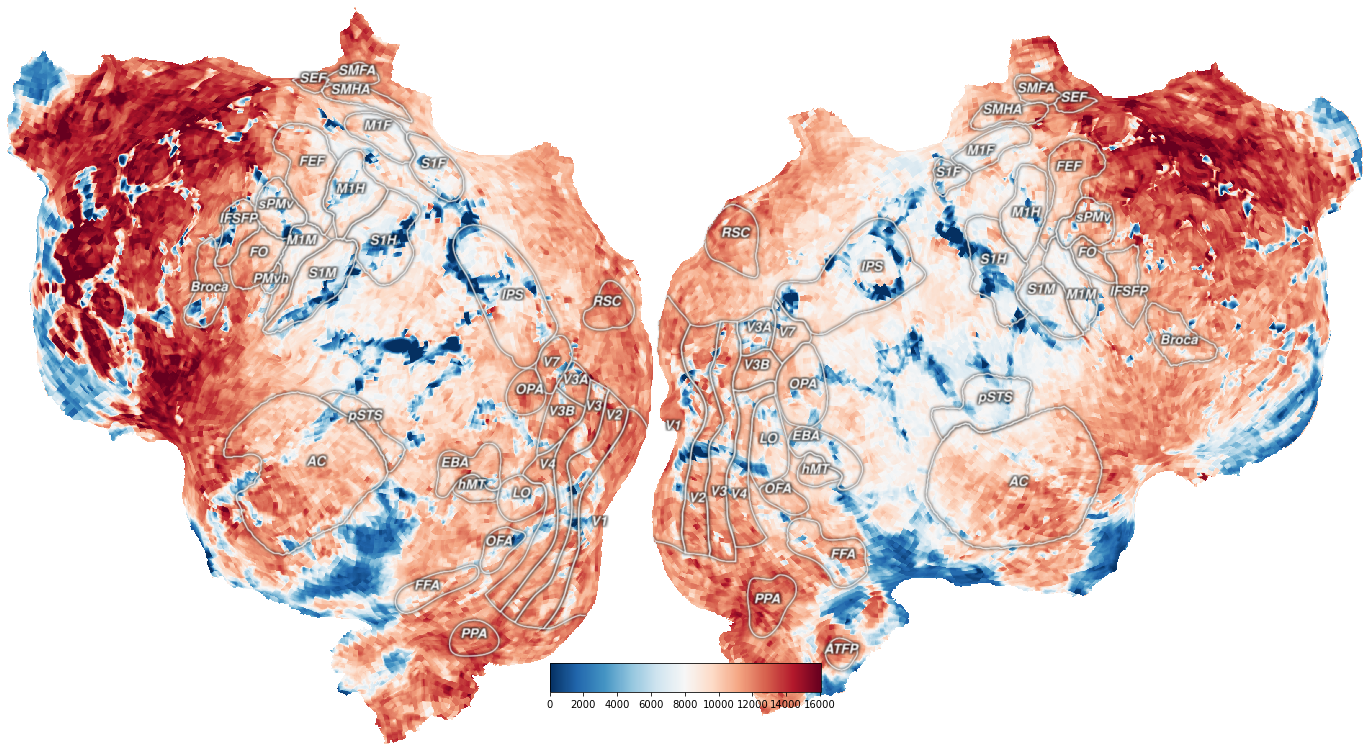

In [17]:
cortex.quickshow(cortex.Volume(fulld[0,0], "AHfs", "20180816AH-sg"));

In [18]:
brainDataZScore = []
for i in range(10):
#     print(brainData[i].get_fdata().T[:,gm_mask].shape)
#     print(np.isnan(brainData[i].get_fdata().T[:,gm_mask]).sum())
#     print(((brainData[i].get_fdata().T[:,gm_mask]) == 0).sum())
#     print(np.isnan(zscore(brainData[i].get_fdata().T[:,gm_mask])).sum())
#     break
    brainDataZScore.append(zscore(brainData[i].get_fdata().T[:,gm_mask]))

/home/angelaz2/code/speechmodeltutorial/npp.py:11: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)


In [19]:
274*94521 - 6495558

19403196

In [20]:
print(brainDataZScore[0])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [16]:
zscore?

In [21]:
brainPersuasionMatrix = []
for i in range(9):
    brainPersuasionMatrix.append([])
    for j in range(10):
        brainPersuasionMatrix[i].append(brainDataZScore[j][11+i:43+i])


In [22]:
print(np.array(brainPersuasionMatrix).shape)

(9, 10, 32, 94251)


In [23]:
for i in range(9):    
    print(brainPersuasionMatrix[i][0].shape)
    print(brainPersuasionMatrix[i][9].shape)
    print(type(brainPersuasionMatrix[i][0]))
    

(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>


# Averaged brain data for social events

In [24]:
brainPersuasionSocial = []
for i in range(9):
    brainPersuasionSocial.append(brainPersuasionMatrix[i].copy())

This brain persuasion social array will hold 9 different delays, of 10 different subjects, with the number of rows representing the number of events instead of the number of TR's

In [25]:
for i in range(9):    
    print(brainPersuasionSocial[i][0].shape)
    print(brainPersuasionSocial[i][9].shape)
    print(type(brainPersuasionSocial[i][0]))
    

(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(32, 94251)
<class 'numpy.ndarray'>


In [26]:
for k in range(9):
    for i in range(10):
        # print(k, " " ,i)
        cols = [[]]*11
        cols[0] = [0, 1]                      # columns to calculate averages, i.e. 3,5,8
        cols[1] = [2, 3, 4]
        cols[2] = [5, 6]
        cols[3] = [7, 8]
        cols[4] = [9]
        cols[5] = [10]
        cols[6] = [11, 12, 13]
        cols[7] = [14, 15, 16, 17]
        cols[8] = [18]
        cols[9] = [19]
        cols[10] = [20, 21, 22, 23, 24, 25, 26, 27]
        a = brainPersuasionSocial[k][i]
        #print("wow", a.shape)
        c = [[]]*11

        for j in range(11):
            #print(a)
            b = a[cols[j], :]
            #print(b.shape)
            c[j] = np.average(b, axis = 0)
            c[j] = c[j].reshape(1, 94251)

        newA = c[0]
        for j in range(1, 11):
            newA = np.r_[newA, c[j]]

        #print(newA.shape)

        brainPersuasionSocial[k][i] = newA
        #print(k, " ", i)

In [27]:
for i in range(10):
    print(brainPersuasionMatrix[0][i].shape)
    print(brainPersuasionSocial[0][i].shape)
    print(type(brainPersuasionMatrix[0][i]))

(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(11, 94251)
<class 'numpy.ndarray'>


# Averaged brain data for movement events

In [28]:
brainPersuasionMovement = []
for i in range(9):
    brainPersuasionMovement.append(brainPersuasionMatrix[i].copy())

This brain persuasion movement array will hold 9 different delays, of 10 different subjects, with the number of rows representing the number of events instead of the number of TR's

In [29]:
for k in range(9):
    for i in range(10):
        print(k, " " ,i)
        cols = [[]]*15
        cols[0] = [0]                      # columns to calculate averages, i.e. 3,5,8
        cols[1] = [1]
        cols[2] = [2, 3]
        cols[3] = [4]
        cols[4] = [5]
        cols[5] = [6, 7]
        cols[6] = [8, 9]
        cols[7] = [10, 11, 12, 13]
        cols[8] = [14, 15, 16, 17]
        cols[9] = [18]
        cols[10] = [19]
        cols[11] = [20-21]
        cols[12] = [22]
        cols[13] = [23]
        cols[14] = [24, 25, 26, 27]
        a = brainPersuasionMovement[k][i]
        #print("wow", a.shape)
        c = [[]]*15

        for j in range(15):
            #print(a)
            b = a[cols[j], :]
            #print(b.shape)
            c[j] = np.average(b, axis = 0)
            c[j] = c[j].reshape(1, 94251)

        newA = c[0]
        for j in range(1, 15):
            newA = np.r_[newA, c[j]]

        #print(newA.shape)

        brainPersuasionMovement[k][i] = newA
        #print(k, " ", i)

0   0
0   1
0   2
0   3
0   4
0   5
0   6
0   7
0   8
0   9
1   0
1   1
1   2
1   3
1   4
1   5
1   6
1   7
1   8
1   9
2   0
2   1
2   2
2   3
2   4
2   5
2   6
2   7
2   8
2   9
3   0
3   1
3   2
3   3
3   4
3   5
3   6
3   7
3   8
3   9
4   0
4   1
4   2
4   3
4   4
4   5
4   6
4   7
4   8
4   9
5   0
5   1
5   2
5   3
5   4
5   5
5   6
5   7
5   8
5   9
6   0
6   1
6   2
6   3
6   4
6   5
6   6
6   7
6   8
6   9
7   0
7   1
7   2
7   3
7   4
7   5
7   6
7   7
7   8
7   9
8   0
8   1
8   2
8   3
8   4
8   5
8   6
8   7
8   8
8   9


In [30]:
for i in range(10):
    print(brainPersuasionMatrix[0][i].shape)
    print(brainPersuasionMovement[0][i].shape)
    print(type(brainPersuasionMatrix[0][i]))

(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>
(32, 94251)
(15, 94251)
<class 'numpy.ndarray'>


# word embeddings matrix averaging


social

In [31]:
cols = [[]]*11
cols[0] = list(range(9, 17))                     # columns to calculate averages, i.e. 3,5,8
cols[1] = list(range(17, 32)) 
cols[2] = list(range(32, 57))
cols[3] = list(range(57, 74))
cols[4] = list(range(74, 87))
cols[5] = list(range(87, 101))
cols[6] = list(range(101, 125))
cols[7] = list(range(125, 138))
cols[8] = list(range(138, 152))
cols[9] = list(range(152, 165))
cols[10] = list(range(165, 181))
a = socArr
c = [[]]*11

for j in range(11):
    #print(a)
    b = a[cols[j], :]
    #print(b.shape)
    c[j] = np.average(b, axis = 0)
    c[j] = c[j].reshape(1, 768)

socAvg = c[0]
for j in range(1, 11):
    socAvg = np.r_[socAvg, c[j]]

print(socAvg.shape)

(11, 768)


movement

In [32]:
cols = [[]]*15
cols[0] = list(range(9, 25))                     # columns to calculate averages, i.e. 3,5,8
cols[1] = list(range(25, 33)) 
cols[2] = list(range(33, 46))
cols[3] = list(range(46, 75))
cols[4] = list(range(75, 89))
cols[5] = list(range(89, 111))
cols[6] = list(range(111, 130))
cols[7] = list(range(130, 155))
cols[8] = list(range(155, 186))
cols[9] = list(range(186, 194))
cols[10] = list(range(194, 224))
cols[11] = list(range(224, 242))
cols[12] = list(range(242, 257))
cols[13] = list(range(257, 274))
cols[14] = list(range(274, 282))
a = mvmtArr
c = [[]]*15

for j in range(15):
    #print(a)
    b = a[cols[j], :]
    #print(b.shape)
    c[j] = np.average(b, axis = 0)
    c[j] = c[j].reshape(1, 768)

mvmtAvg = c[0]
for j in range(1, 15):
    mvmtAvg = np.r_[mvmtAvg, c[j]]

print(mvmtAvg.shape)

(15, 768)


# Getting social correlations

In [39]:
wt = np.load("wt.npy")

In [40]:
print ("wt has shape: ", wt.shape)

wt has shape:  (3072, 94251)


In [41]:
wtSplit = np.split(wt, 4)
print(wtSplit[1].shape)

newWt = (wtSplit[0] + wtSplit[1] + wtSplit[2] + wtSplit[3])/4
print(newWt.shape)

(768, 94251)
(768, 94251)


In [42]:
corrSocial = []
predSocial = []
corrSocialEvent = []
for i in range(9):
    predSocial.append([])
    corrSocial.append([])
    corrSocialEvent.append([])
    for j in range(10):
        predSocial[i].append([])
        corrSocial[i].append([])
        corrSocialEvent[i].append([])
        for k in range(brainPersuasionSocial[i][j].shape[0]):
            corrSocialEvent[i][j].append(0)
        for k in range(brainPersuasionSocial[i][j].shape[1]):
            corrSocial[i][j].append(0)
    
brainMatrix = []
stimSocial = socAvg.copy()
stimSocial = np.concatenate([stimSocial, stimSocial, stimSocial, stimSocial], axis =1)
print(stimSocial.shape)
pred = []

for i in range(9): #delays
    for j in range(10): #patients
        brainMatrix = brainPersuasionSocial[i][j]
        #print(brainMatrix.shape)
        pred = np.dot(socAvg, newWt)
        predSocial[i][j] = pred
        #for k in range(1, 4):
        #    brainMatrix = np.concatenate([brainMatrix, brainPersuasionSocial[i+k][j]], axis = 0)
        #print(brainMatrix.shape)
        
print(np.array(predSocial).shape)

(11, 3072)
(9, 10, 11, 94251)


In [43]:
corrMovement = []
predMovement = []
corrMovementEvent = []
for i in range(9):
    predMovement.append([])
    corrMovement.append([])
    corrMovementEvent.append([])
    for j in range(10):
        predMovement[i].append([])
        corrMovement[i].append([])
        corrMovementEvent[i].append([])
        for k in range(brainPersuasionMovement[i][j].shape[0]):
            corrMovementEvent[i][j].append(0)
        for k in range(brainPersuasionMovement[i][j].shape[1]):
            corrMovement[i][j].append(0)
    
brainMatrix = []

pred = []

for i in range(9): #delays
    for j in range(10): #patients
        brainMatrix = brainPersuasionMovement[i][j]
        #print(brainMatrix.shape)
        pred = np.dot(mvmtAvg, newWt)
        predMovement[i][j] = pred
        #for k in range(1, 4):
        #    brainMatrix = np.concatenate([brainMatrix, brainPersuasionSocial[i+k][j]], axis = 0)
        #print(brainMatrix.shape)

In [47]:
print(brainPersuasionSocial[0][0])
print(predSocial[0][0])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[-0.04684405 -0.08237174 -0.0393338  ... -0.0464636  -0.02051647
  -0.05508128]
 [-0.03280989 -0.07911512 -0.0403201  ... -0.05476437 -0.02056385
  -0.04240585]
 [-0.04549221 -0.07291931 -0.0340641  ... -0.03149371 -0.02760382
  -0.04344195]
 ...
 [-0.03458776 -0.0714879  -0.03349854 ... -0.03685046 -0.01216735
  -0.05005744]
 [-0.04684234 -0.08075577 -0.0242784  ... -0.04575306 -0.02515747
  -0.04800471]
 [-0.04642523 -0.0837121  -0.0188773  ... -0.03490494 -0.00460878
  -0.05502882]]


In [48]:
print(brainPersuasionMovement[0][0])
print(predMovement[0][0])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[-0.03569683 -0.06806176 -0.03932845 ... -0.06003046 -0.02105342
  -0.0372136 ]
 [-0.04180273 -0.07402647 -0.04435855 ... -0.05039076 -0.02767706
  -0.02829185]
 [-0.05079698 -0.09133741 -0.0311016  ... -0.05097032 -0.02189612
  -0.04518502]
 ...
 [-0.04727404 -0.07001083 -0.03607471 ... -0.03502243 -0.01901914
  -0.02806827]
 [-0.05737355 -0.07793996 -0.00860954 ... -0.03924108 -0.0085287
  -0.04602293]
 [-0.04187519 -0.07795824 -0.0213212  ... -0.06457593 -0.02002753
  -0.0563168 ]]


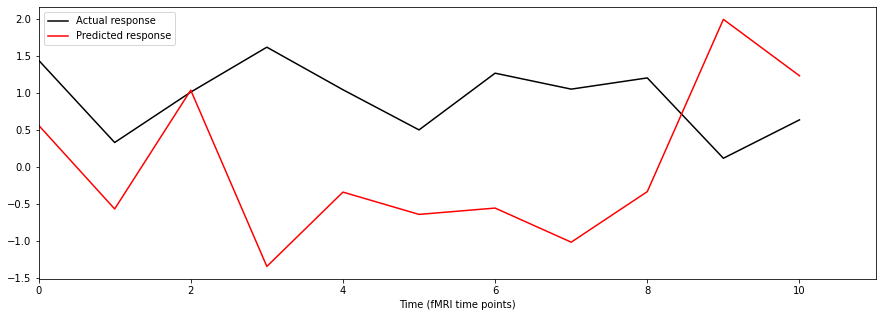

In [49]:
f = figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)

selvox = 20710 # a decent voxel

realresp = ax.plot((brainPersuasionSocial[0][0][:,selvox]), 'k')[0]
predresp = ax.plot(zscore(predSocial[0][0][:,selvox]), 'r')[0]

ax.set_xlim(0, 11)
ax.set_xlabel("Time (fMRI time points)")

ax.legend((realresp, predresp), ("Actual response", "Predicted response"));

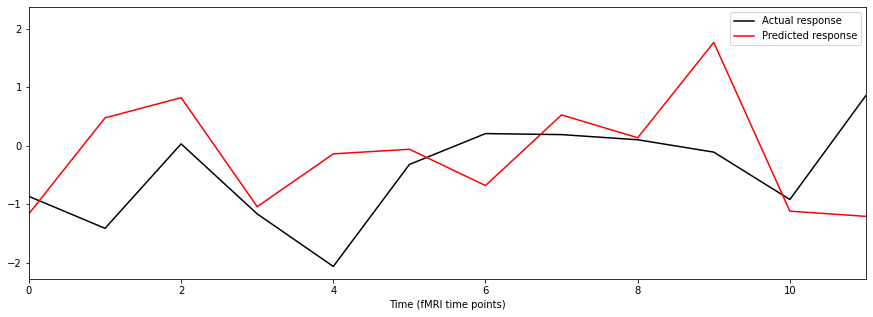

In [50]:
f = figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)

selvox = 20740 # a decent voxel

realresp = ax.plot((brainPersuasionMovement[0][0][:,selvox]), 'k')[0]
predresp = ax.plot(zscore(predMovement[0][0][:,selvox]), 'r')[0]

ax.set_xlim(0, 11)
ax.set_xlabel("Time (fMRI time points)")

ax.legend((realresp, predresp), ("Actual response", "Predicted response"));

In [51]:
import numpy.ma as ma

print("-------------------- EACH EVENT ------------------")
for i in range(9):
    for j in range(10):
        for k in range(brainPersuasionSocial[i][j].shape[0]):
            nans = np.isnan(brainPersuasionSocial[i][j][k])
            newMask = np.logical_not(nans)
            voxcorr = np.corrcoef(brainPersuasionSocial[i][j][k][newMask], zscore(predSocial[i][j][k][newMask]))[0,1]
            corrSocialEvent[i][j][k] = voxcorr
#             print(voxcorr)
#             break
            
print(np.count_nonzero(np.isnan(np.array(corrSocialEvent))))
print("------------------ EACH VOXEL ------------------------")
for i in range(9):
    for j in range(10):
        for k in range(brainPersuasionSocial[i][j].shape[1]):
            voxcorr = np.corrcoef(brainPersuasionSocial[i][j][:,k], zscore(predSocial[i][j][:,k]))[0,1]
            corrSocial[i][j][k] = voxcorr
#             print(voxcorr)
#             break


#for j in range(8, 10):
#    print(corrSocial[8][j])

-------------------- EACH EVENT ------------------
0
------------------ EACH VOXEL ------------------------


/home/angelaz2/anaconda3/envs/speech/lib/python3.7/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/angelaz2/anaconda3/envs/speech/lib/python3.7/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [51]:
print(corrSocialEvent.shape)
print(corrSocial.shape)

(9, 10, 11)
(9, 10, 94251)


In [52]:
for i in range(9):
    for j in range(10):
        for k in range(brainPersuasionMovement[i][j].shape[0]):
            nans = np.isnan(brainPersuasionMovement[i][j][k])
            newMask = np.logical_not(nans)
            voxcorr = np.corrcoef(brainPersuasionMovement[i][j][k][newMask], zscore(predMovement[i][j][k][newMask]))[0,1]
            corrMovementEvent[i][j][k] = voxcorr

for i in range(9):
    for j in range(10):
        for k in range(brainPersuasionMovement[i][j].shape[1]):
            voxcorr = np.corrcoef(brainPersuasionMovement[i][j][:,k], zscore(predMovement[i][j][:,k]))[0,1]
            corrMovement[i][j][k] = voxcorr
        #print(corrSocial[i][j])

#for j in range(8, 10):
#    print(corrSocial[8][j])

In [77]:
import statistics 

corrPerSubject = []
for i in range(9):
    corrPerSubject.append([])
    for j in range(10):
        corrPerSubject[i].append(0)
        corrPerSubject[i][j] = np.nanmean(corrSocial[i][j])

corrPerSubjectSocialAcrossEvent = []
for i in range(9):
    corrPerSubjectSocialAcrossEvent.append([])
    for j in range(10):
        corrPerSubjectSocialAcrossEvent[i].append(0)
        corrPerSubjectSocialAcrossEvent[i][j] = np.nanmean(corrSocialEvent[i][j])

for i in range(9):
    for j in range(10):
        print(corrPerSubject[i][j])

print("-----------------------------------------------------")
for i in range(9):
    for j in range(10):
        print(corrPerSubjectSocialAcrossEvent[i][j])
        

0.004952608712753557
-0.0008964345284576806
-0.001133097871254974
-0.001253394701771695
0.0020933722069380024
-0.001966196086117767
-0.00818919650227876
0.00112340974064943
-0.0002974320165605907
-0.005997333224737757
-0.0015904626094702852
-0.005017290090498867
-0.0019002370652883667
-0.0017451510631855585
-0.0031586389009444866
-0.004767350599345027
-0.006176718958114606
-0.0007606708137982651
-0.00017383001157010884
-0.005716966485674403
-0.0017564946997486904
-0.004091372887403047
-0.0037729127546332684
-0.0029545146982249636
-0.004152429995224175
-0.00316769768868856
-0.010371160214933289
-0.004499687096024374
-0.003947079324295279
-0.0045177042507347645
-0.004482174229059911
-0.007712423251090406
0.00011931065554670177
-0.00019225966794332252
-0.0021892682304636814
-0.0019824296001256783
-0.005909656054115268
-0.007098198656884889
-0.004246259827891016
-0.008400105911925452
-0.0025045965198477707
-0.005019922793886563
-0.0026518509895765347
-0.00025115513310241367
-7.425749512441

In [78]:

corrPerSubjectMovement = []
for i in range(9):
    corrPerSubjectMovement.append([])
    for j in range(10):
        corrPerSubjectMovement[i].append(0)
        corrPerSubjectMovement[i][j] = np.nanmean(corrMovement[i][j])
        
corrPerSubjectMovementAcrossEvent = []
for i in range(9):
    corrPerSubjectMovementAcrossEvent.append([])
    for j in range(10):
        corrPerSubjectMovementAcrossEvent[i].append(0)
        corrPerSubjectMovementAcrossEvent[i][j] = np.nanmean(corrMovementEvent[i][j])

for i in range(9):
    for j in range(10):
        print(corrPerSubjectMovement[i][j])

print("-----------------------------------------------------")
for i in range(9):
    for j in range(10):
        print(corrPerSubjectMovementAcrossEvent[i][j])

0.002196834235948064
0.0077948918965057646
0.005813890339892806
-0.0012654751439073984
0.006430866036398023
0.004674582742050242
0.007605055907082064
0.012895440008219345
0.005492879978571729
0.005229344197103715
0.004063058867612795
0.007897688682159605
0.004863979313954881
-0.001468636022497454
0.00523390043850359
0.002998694400415444
0.0037153706710724597
0.008853305430946366
0.004073764155470507
0.00620950032360607
0.0006822682717651483
0.005358402201463784
0.005895514891900832
-0.0041605974798782225
0.009959181538871556
0.001035764814940989
0.004141289901312819
0.009763609793045178
0.005952678905860182
0.006089731539912516
-0.00698772571849615
0.005613642699772117
0.004858686369948185
-0.0031250680966763062
0.006214025727376753
-0.00010530783760035473
0.0016835141866129086
0.007860393214229095
0.006707771129174674
0.007837670887910786
-0.008621724148557611
0.0016301310087897159
0.003105905433778989
-0.006488331656354936
0.004406989113285746
-0.0016326524282985198
-9.19365460791132

In [108]:
np.save("corrSocial", corrSocial)
np.save("corrMovement", corrMovement)
np.save("corrPerSubjectSocial", corrPerSubject)
np.save("corrPerSubjectMovement", corrPerSubjectMovement)
np.save("corrPerSubjectSocialAcrossEvent", corrPerSubjectSocialAcrossEvent)
np.save("corrPerSubjectMovementAcrossEvent", corrPerSubjectMovementAcrossEvent)

In [109]:
np.save("corrSocialEvent", corrSocialEvent)
np.save("corrMovementEvent", corrMovementEvent)

# Plotting Stuff!

In [33]:
corrSocial = np.load("corrSocial.npy")
corrMovement = np.load("corrMovement.npy")
corrPerSubjectSocial = np.load("corrPerSubjectSocial.npy")
corrPerSubjectMovement = np.load("corrPerSubjectMovement.npy")
corrPerSubjectSocialAcrossEvent = np.load("corrPerSubjectSocialAcrossEvent.npy")
corrPerSubjectMovementAcrossEvent = np.load("corrPerSubjectMovementAcrossEvent.npy")

In [34]:
corrSocialEvent = np.load("corrSocialEvent.npy")
corrMovementEvent = np.load("corrMovementEvent.npy")

In [53]:
bestOverallSocial = [0, 0, 0]
bestOverallMovement = [0, 0, 0]
avgSocCorr = 0
avgMvmtCorr = 0
subjectCorrsSoc = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
subjectCorrsMvmt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
delayCorrsSoc = [0, 0, 0, 0, 0, 0, 0, 0, 0]
delayCorrsMvmt = [0, 0, 0, 0, 0, 0, 0, 0, 0]
bestDPSSocEventNumber = [-1,-1,-1,-1,-1,-1,-1,-1,-1, -1]
bestDPSMovEventNumber = [-1,-1,-1,-1,-1,-1,-1,-1,-1, -1]
bestDelayPerSubjectSoc = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
bestDelayPerSubjectMov = [-1,-1,-1,-1,-1,-1,-1,-1,-1, -1]

for i in range(9):
    delayS = 0
    delayM = 0
    for j in range(10):
        soc = corrPerSubjectSocial[i][j]
        mvmt = corrPerSubjectMovement[i][j]
        delayS += soc
        delayM += mvmt
        subjectCorrsSoc[j] += soc
        subjectCorrsMvmt[j] += mvmt
        if (soc > bestDelayPerSubjectSoc[j]):
            bestDPSSocEventNumber[j] = i
            bestDelayPerSubjectSoc[j] = soc
        if (mvmt > bestDelayPerSubjectMov[2]):
            bestDPSMovEventNumber[j] = i
            bestDelayPerSubjectMov[j] = mvmt
        if (soc > bestOverallSocial[2]):
            bestOverallSocial[0] = i
            bestOverallSocial[1] = j
            bestOverallSocial[2] = soc
        avgSocCorr += soc
        if (mvmt > bestOverallMovement[2]):
            bestOverallMovement[0] = i
            bestOverallMovement[1] = j
            bestOverallMovement[2] = corrPerSubjectMovement[i][j]
        avgMvmtCorr += mvmt
    
    delayCorrsSoc[i] = delayS/10
    delayCorrsMvmt[i] = delayM/10


for i in range(9):
    delayS = 0
    delayM = 0
    for j in range(10):
        soc = corrPerSubjectSocialAcrossEvent[i][j]
        mvmt = corrPerSubjectMovementAcrossEvent[i][j]
        delayS += soc
        delayM += mvmt
        subjectCorrsSoc[j] += soc
        subjectCorrsMvmt[j] += mvmt
        
    
    delayCorrsSoc[i] = delayS/10
    delayCorrsMvmt[i] = delayM/10


print("----------------DELAYS---------------")
bestDelaySocial = [0, -1]
bestDelayMovement = [0,-1]
for i in range(9):
    print("social: ", delayCorrsSoc[i], " movement: ", delayCorrsMvmt[i])
    if (delayCorrsSoc[i] > bestDelaySocial[1]):
        bestDelaySocial[0] = i
        bestDelaySocial[1] = delayCorrsSoc[i]
    if (delayCorrsMvmt[i] > bestDelayMovement[1]):
        bestDelayMovement[0] = i
        bestDelayMovement[1] = delayCorrsMvmt[i]
        
print("BEST DELAY MOVEMENT: ", bestDelayMovement[0], ", ", bestDelayMovement[1])
print("BEST DELAY SOCIAL: ", bestDelaySocial[0], ", ", bestDelaySocial[1])

print("-------------- SUBJECTS -------------")
for i in range(10):
    subjectCorrsSoc[i] = subjectCorrsSoc[i]/10
    subjectCorrsMvmt[i] = subjectCorrsMvmt[i]/10
    print("social: ", subjectCorrsSoc[i], " movement: ", subjectCorrsMvmt[i])
    
    
avgSocCorr = avgSocCorr/90
avgMvmtCorr = avgMvmtCorr/90
print(bestOverallSocial)
print(bestOverallMovement)
print("AVERAGE SOCIAL CORRELATION ", avgSocCorr)
print("AVERAGE MOVEMENT CORRELATION ", avgMvmtCorr)

----------------DELAYS---------------
social:  0.0040070928504204375  movement:  0.00512059061005617
social:  0.004618192436481127  movement:  0.005278012960748904
social:  0.005174438176296812  movement:  0.005306382892083277
social:  0.005616416622441169  movement:  0.0055661476166897084
social:  0.006395876274127128  movement:  0.006627645986542327
social:  0.007189800305173202  movement:  0.0069505568023293315
social:  0.0076375364894568755  movement:  0.00703798880099892
social:  0.008312456257632331  movement:  0.007445103792711208
social:  0.009484130565883861  movement:  0.008840322404869113
BEST DELAY MOVEMENT:  8 ,  0.008840322404869113
BEST DELAY SOCIAL:  8 ,  0.009484130565883861
-------------- SUBJECTS -------------
social:  0.01579698329211172  movement:  0.013867273739643016
social:  3.059785887862864e-05  movement:  0.009343944793289243
social:  0.003858907919680314  movement:  0.008700576403151415
social:  0.006531692282030844  movement:  0.002351774614144453
social:  

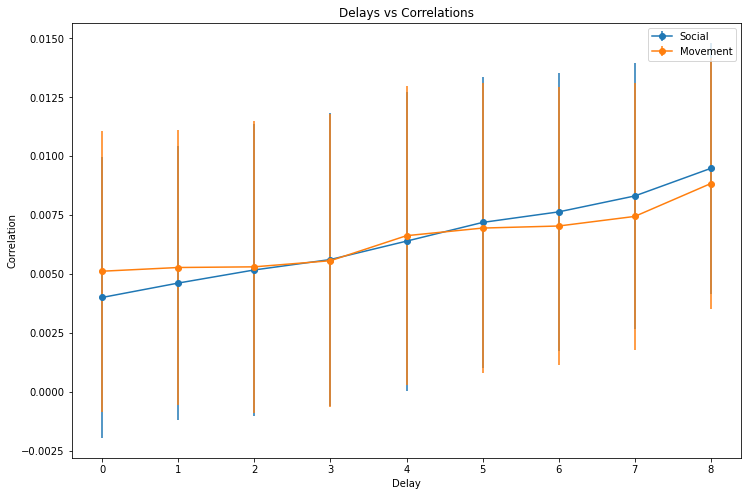

In [48]:
import matplotlib.pyplot as plt

f = figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)

X_axis = np.arange(9) 
  
# ax.bar(X_axis - 0.2, delayCorrsSoc, 0.4, label = 'Social') 
# ax.bar(X_axis + 0.2, delayCorrsMvmt, 0.4, label = 'Movement') 

# ax.plot(delayCorrsSoc,  label = 'Social') 
# ax.plot(delayCorrsMvmt,  label = 'Movement') 

# plt.xticks(X_axis, X_axis) 

ax.set_xlabel("Delay")
ax.set_ylabel("Correlation");
ax.set_title("Delays vs Correlations")
std  = np.std(corrPerSubjectSocialAcrossEvent, axis = 1)
ax.errorbar(np.arange(9), delayCorrsSoc, yerr=std, fmt='-o', label = 'Social')
std2 = np.std(corrPerSubjectMovementAcrossEvent, axis = 1)
ax.errorbar(np.arange(9), delayCorrsMvmt, yerr=std, fmt='-o', label = 'Movement')
ax.legend()

9
(10,)


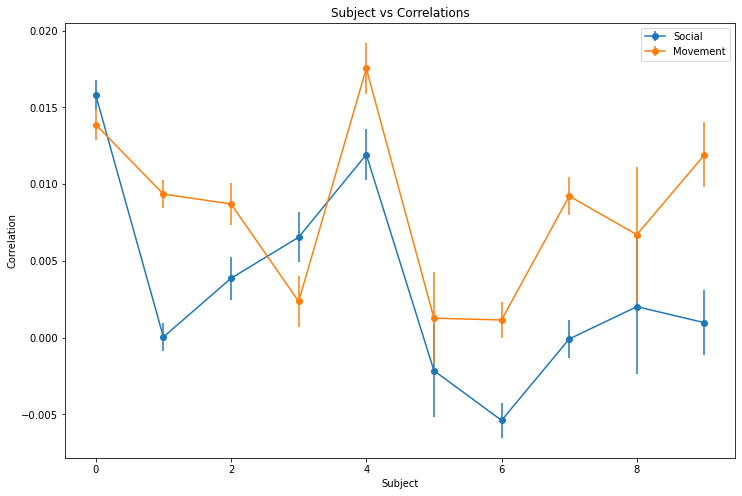

In [69]:
import matplotlib.pyplot as plt

f = figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)

X_axis = np.arange(10) 
  
# ax.bar(X_axis - 0.2, delayCorrsSoc, 0.4, label = 'Social') 
# ax.bar(X_axis + 0.2, delayCorrsMvmt, 0.4, label = 'Movement') 

# ax.plot(subjectCorrsSoc,  label = 'Social') 
# ax.plot(subjectCorrsMvmt,  label = 'Movement') 

std  = np.std(corrPerSubjectSocialAcrossEvent, axis = 0)

print(len(delayCorrsSoc))
print(std.shape)
ax.errorbar(np.arange(10), subjectCorrsSoc, yerr=std, fmt='-o', label = 'Social')
std2 = np.std(corrPerSubjectMovementAcrossEvent, axis = 0)
ax.errorbar(np.arange(10), subjectCorrsMvmt, yerr=std, fmt='-o', label = 'Movement')

# plt.xticks(X_axis, X_axis) 

ax.set_xlabel("Subject")
ax.set_ylabel("Correlation");
ax.set_title("Subject vs Correlations")
ax.legend()

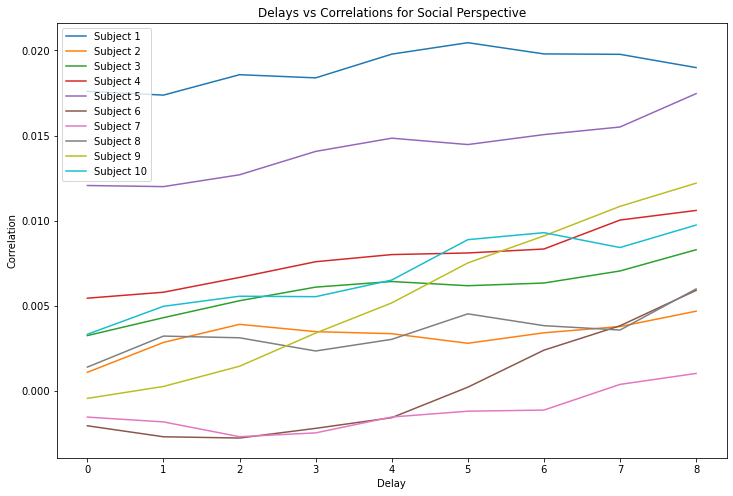

In [38]:
# Plot histogram of correlations
f = figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)
for i in range(0, 10):
    ax.plot(list(range(0, 9)), np.array(corrPerSubjectSocialAcrossEvent)[:,i], label = "Subject " + str(i+1)) # histogram correlations with 100 bin

ax.set_xlabel("Delay")
ax.set_ylabel("Correlation");
ax.set_title("Delays vs Correlations for Social Perspective")
ax.legend()

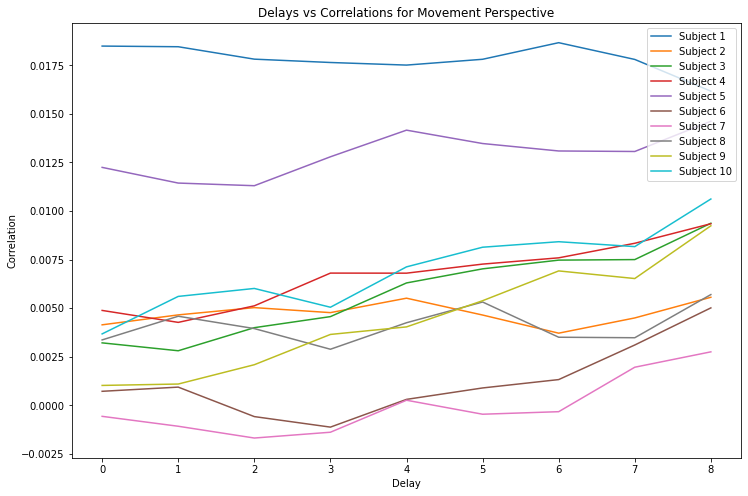

In [39]:
# Plot histogram of correlations
f = figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)
for i in range(0, 10):
    ax.plot(list(range(0, 9)), np.array(corrPerSubjectMovementAcrossEvent)[:,i], label = "Subject " + str(i+1)) # histogram correlations with 100 bin

ax.set_xlabel("Delay")
ax.set_ylabel("Correlation");
ax.set_title("Delays vs Correlations for Movement Perspective")
ax.legend()

[0.01676291 0.01606911 0.0229657  0.01458769 0.01612682 0.01607241
 0.02214672 0.02906713 0.01628317 0.01212846 0.02668419]
[ 0.00929045 -0.000852   -0.00065959  0.00799503  0.01157681 -0.00095031
  0.01849635  0.00179972 -0.00296993  0.0100259  -0.00232852]
[ 0.00200635  0.0133959   0.00937765  0.0061599   0.01755077  0.00133932
  0.00781889  0.003282   -0.00076046  0.01046615  0.02051012]
[0.01588088 0.01298172 0.00499469 0.00692879 0.00875054 0.01207261
 0.01321475 0.01438151 0.01007255 0.01093574 0.00633446]
[0.01238797 0.01095094 0.01595633 0.01918926 0.01330191 0.02748196
 0.03172476 0.01674656 0.00493265 0.01765868 0.02174124]
[-0.00334157 -0.00590863  0.01155637  0.01112317  0.01902556  0.01117168
 -0.0019498  -0.00587064  0.0036841   0.01161779  0.01377408]
[ 0.00830673  0.00850004  0.01225581  0.00336404  0.01297163 -0.0064501
 -0.01638874 -0.01480196  0.00019983  0.00587312 -0.00265043]
[-0.00209329  0.00777672  0.00654538  0.00717163  0.0076641   0.0056075
  0.01325774  0.0

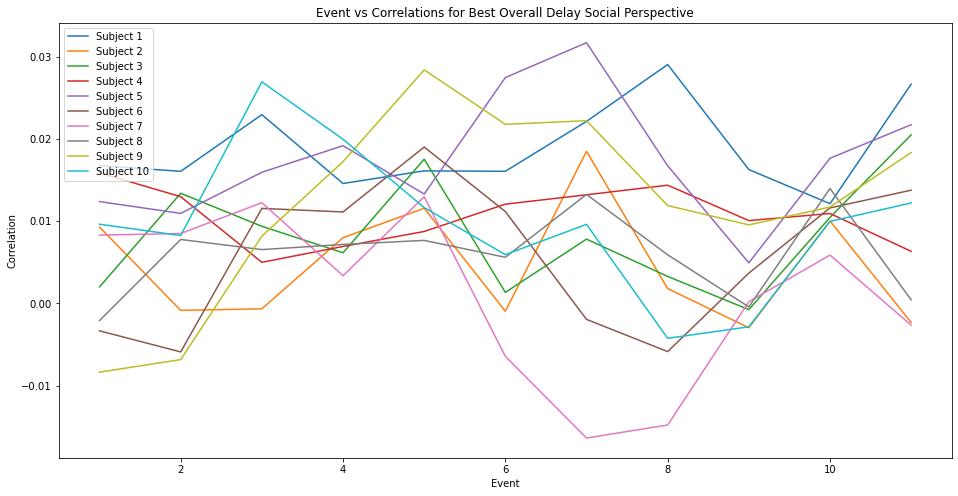

In [40]:
# Plot histogram of correlations
f = figure(figsize=(16,8))
ax = f.add_subplot(1,1,1)
labeling = []
labels = []
for i in range(0, 10):
    print(corrSocialEvent[bestDelaySocial[0]][i])
for i in range(0, 10):
    ax.plot(list(range(1, 12)), corrSocialEvent[bestDelaySocial[0]][i], label = "Subject " + str(i+1)) # histogram correlations with 100 bins

for i in range(0, 10):
    labels.append("Subject " + str(i));
ax.set_xlabel("Event")
ax.set_ylabel("Correlation");
ax.set_title("Event vs Correlations for Best Overall Delay Social Perspective")
ax.legend()
#so for this one,

[0.01676291 0.01606911 0.0229657  0.01458769 0.01612682 0.01607241
 0.02214672 0.02906713 0.01628317 0.01212846 0.02668419]
[ 0.00929045 -0.000852   -0.00065959  0.00799503  0.01157681 -0.00095031
  0.01849635  0.00179972 -0.00296993  0.0100259  -0.00232852]
[ 0.00200635  0.0133959   0.00937765  0.0061599   0.01755077  0.00133932
  0.00781889  0.003282   -0.00076046  0.01046615  0.02051012]
[0.01588088 0.01298172 0.00499469 0.00692879 0.00875054 0.01207261
 0.01321475 0.01438151 0.01007255 0.01093574 0.00633446]
[0.01238797 0.01095094 0.01595633 0.01918926 0.01330191 0.02748196
 0.03172476 0.01674656 0.00493265 0.01765868 0.02174124]
[-0.00334157 -0.00590863  0.01155637  0.01112317  0.01902556  0.01117168
 -0.0019498  -0.00587064  0.0036841   0.01161779  0.01377408]
[ 0.00830673  0.00850004  0.01225581  0.00336404  0.01297163 -0.0064501
 -0.01638874 -0.01480196  0.00019983  0.00587312 -0.00265043]
[-0.00209329  0.00777672  0.00654538  0.00717163  0.0076641   0.0056075
  0.01325774  0.0

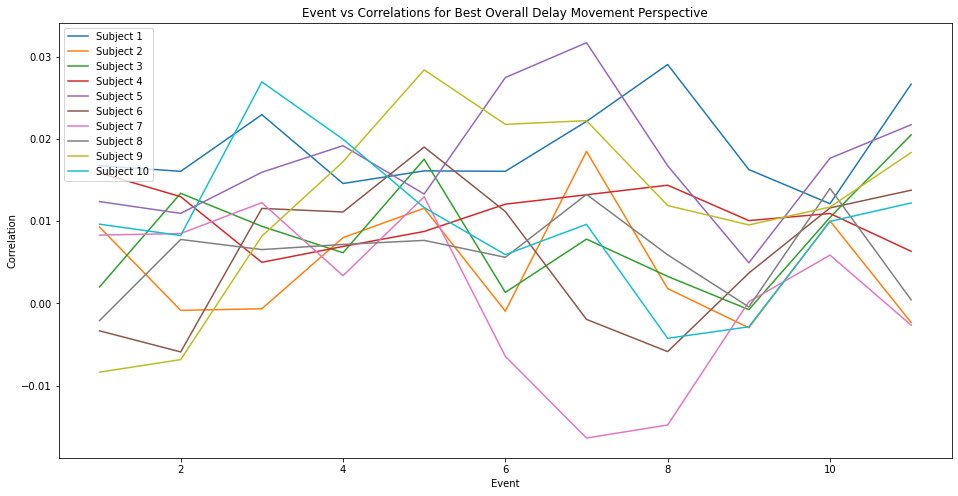

In [41]:
# Plot histogram of correlations
f = figure(figsize=(16,8))
ax = f.add_subplot(1,1,1)
labeling = []
labels = []
for i in range(0, 10):
    print(corrSocialEvent[bestDelayMovement[0]][i])
for i in range(0, 10):
    ax.plot(list(range(1, 12)), corrSocialEvent[bestDelayMovement[0]][i], label = "Subject " + str(i+1)) # histogram correlations with 100 bins

for i in range(0, 10):
    labels.append("Subject " + str(i));
ax.set_xlabel("Event")
ax.set_ylabel("Correlation");
ax.set_title("Event vs Correlations for Best Overall Delay Movement Perspective")
ax.legend()
#so for this one,

0
[0.00387175 0.0190628  0.01586609 0.01765948 0.0164484  0.0087201
 0.01987159 0.0163385  0.01911164 0.02549055 0.03108713]
8
[ 0.00929045 -0.000852   -0.00065959  0.00799503  0.01157681 -0.00095031
  0.01849635  0.00179972 -0.00296993  0.0100259  -0.00232852]
3
[-0.00609938 -0.00677527  0.00341464  0.0126332   0.00881505  0.00958194
  0.01075499  0.00580046  0.00939166  0.00553305  0.01393613]
8
[0.01588088 0.01298172 0.00499469 0.00692879 0.00875054 0.01207261
 0.01321475 0.01438151 0.01007255 0.01093574 0.00633446]
0
[ 0.00297548 -0.00124602  0.00190234  0.00688829  0.00943161  0.01343339
  0.01362819  0.01278929  0.0243229   0.02236688  0.02617608]
8
[-0.00334157 -0.00590863  0.01155637  0.01112317  0.01902556  0.01117168
 -0.0019498  -0.00587064  0.0036841   0.01161779  0.01377408]
8
[ 0.00830673  0.00850004  0.01225581  0.00336404  0.01297163 -0.0064501
 -0.01638874 -0.01480196  0.00019983  0.00587312 -0.00265043]
0
[-0.01990166  0.00208385 -0.00935995 -0.00373822 -0.00188572  0

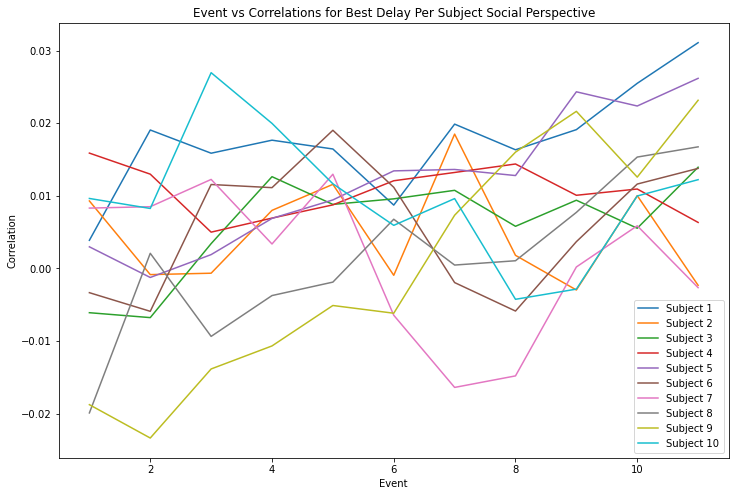

In [42]:
# Plot histogram of correlations
f = figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)
labeling = []
labels = []
for i in range(0, 10):
    print(bestDPSSocEventNumber[i])
    print(corrSocialEvent[bestDPSSocEventNumber[i]][i])
for i in range(0, 10):
    ax.plot(list(range(1, 12)), corrSocialEvent[bestDPSSocEventNumber[i]][i], label = "Subject " + str(i+1)) # histogram correlations with 100 bins

for i in range(0, 10):
    labels.append("Subject " + str(i));
ax.set_xlabel("Event")
ax.set_ylabel("Correlation");
ax.set_title("Event vs Correlations for Best Delay Per Subject Social Perspective")
ax.legend()
#so for this one,

0
[0.00387175 0.0190628  0.01586609 0.01765948 0.0164484  0.0087201
 0.01987159 0.0163385  0.01911164 0.02549055 0.03108713]
8
[ 0.00929045 -0.000852   -0.00065959  0.00799503  0.01157681 -0.00095031
  0.01849635  0.00179972 -0.00296993  0.0100259  -0.00232852]
2
[-0.00826548 -0.00199882 -0.00564812  0.00896613  0.01519895  0.00698598
  0.01104238  0.00652618  0.00503886  0.00799125  0.01235622]
-1
[0.01588088 0.01298172 0.00499469 0.00692879 0.00875054 0.01207261
 0.01321475 0.01438151 0.01007255 0.01093574 0.00633446]
7
[0.00997308 0.00994476 0.01360295 0.01757402 0.02120369 0.01013725
 0.0340112  0.0193538  0.00125935 0.01074395 0.02268685]
-1
[-0.00334157 -0.00590863  0.01155637  0.01112317  0.01902556  0.01117168
 -0.0019498  -0.00587064  0.0036841   0.01161779  0.01377408]
0
[-0.00944919 -0.00149452 -0.00321605  0.00242231  0.00221456  0.01157153
  0.00761447  0.00619602 -0.00941709 -0.00786844 -0.01561125]
3
[-0.00412102 -0.00867573 -0.00092369  0.00784544  0.00436431  0.0008472

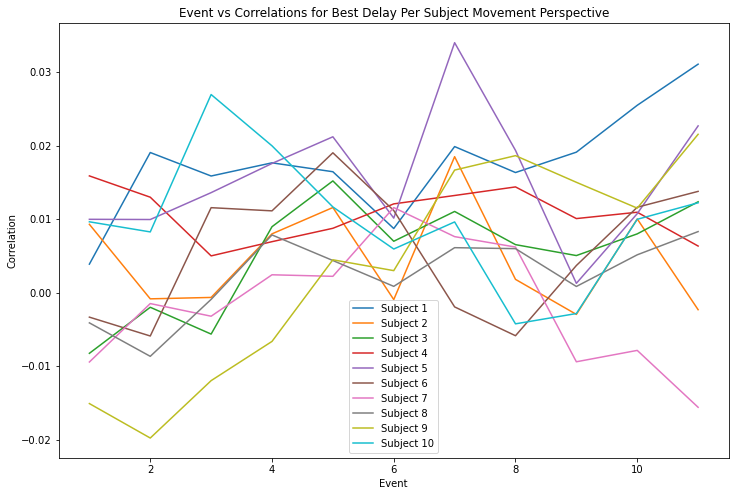

In [43]:
# Plot histogram of correlations
f = figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)
labeling = []
labels = []
for i in range(0, 10):
    print(bestDPSMovEventNumber[i])
    print(corrSocialEvent[bestDPSMovEventNumber[i]][i])
for i in range(0, 10):
    ax.plot(list(range(1, 12)), corrSocialEvent[bestDPSMovEventNumber[i]][i], label = "Subject " + str(i+1)) # histogram correlations with 100 bins

for i in range(0, 10):
    labels.append("Subject " + str(i));
ax.set_xlabel("Event")
ax.set_ylabel("Correlation");
ax.set_title("Event vs Correlations for Best Delay Per Subject Movement Perspective")
ax.legend()
#so for this one,

In [54]:
corrSocial.shape

(9, 10, 94251)

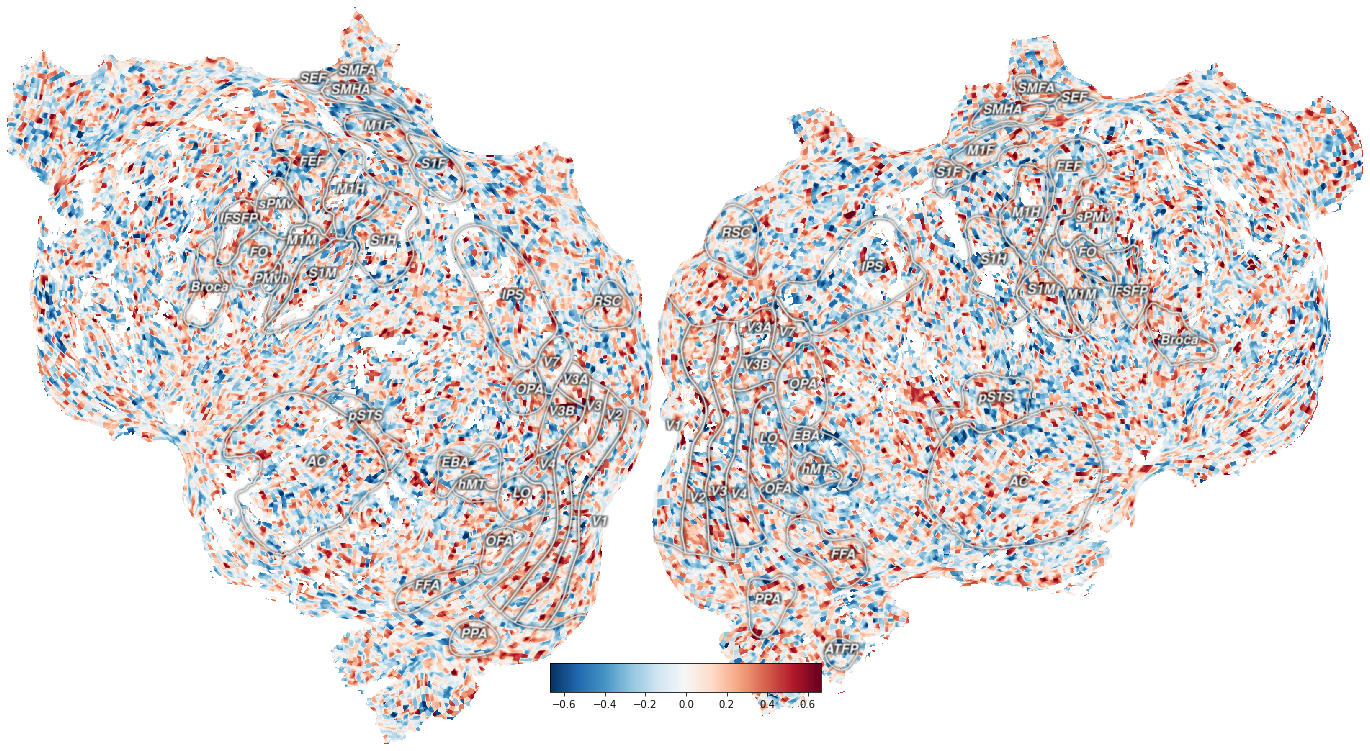

In [59]:
bestDelaySubjectSoc = [0, 0,-1]
for i in range(9):
    for j in range(10):
        if (corrPerSubjectSocial[i][j] > bestDelaySubjectSoc[2]):
            bestDelaySubjectSoc[2] = corrPerSubjectSocial[i][j]
            bestDelaySubjectSoc[0] = i
            bestDelaySubjectSoc[1] = j
        
cortex.quickshow(cortex.Volume(corrSocial[i,j], "AHfs", "20180816AH-sg"));

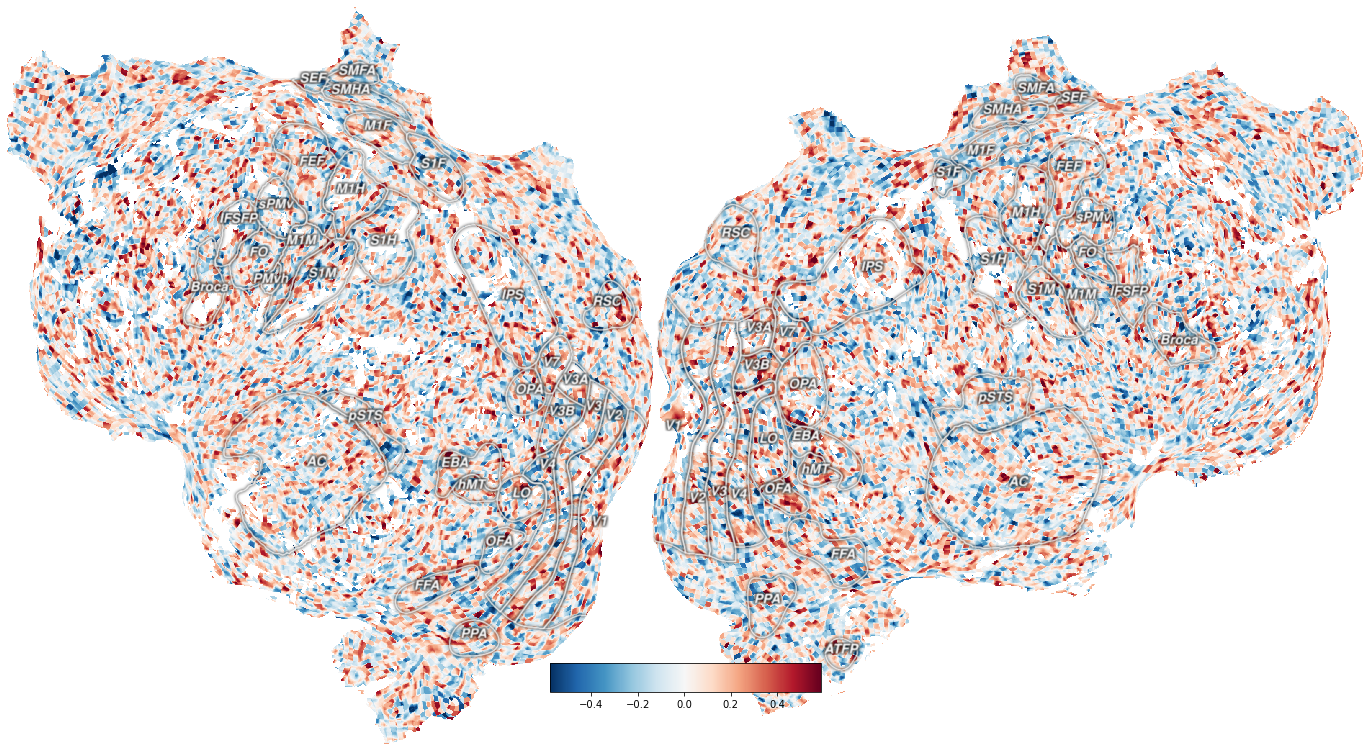

In [61]:
bestDelaySubjectMov = [0, 0,-1]
for i in range(9):
    for j in range(10):
        if (corrPerSubjectMovement[i][j] > bestDelaySubjectMov[2]):
            bestDelaySubjectMov[2] = corrPerSubjectMovement[i][j]
            bestDelaySubjectMov[0] = i
            bestDelaySubjectMov[1] = j
        
cortex.quickshow(cortex.Volume(corrMovement[i,j], "AHfs", "20180816AH-sg"));

# Other

In [61]:
brainData[0].get_fdata().shape

(84, 84, 54, 274)

In [13]:
gm_mask.shape

(54, 84, 84)

In [39]:
brainData[0].get_fdata().T[:,gm_mask].shape

(274, 94251)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

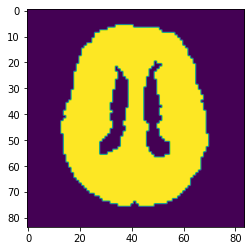

In [18]:
plt.imshow(gm_mask[27])

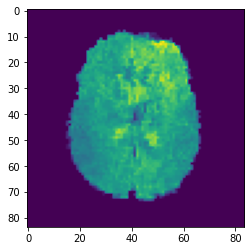

In [17]:
plt.imshow(brainData1.get_fdata().T[0,27,:,:])

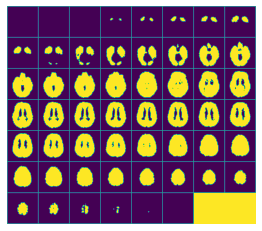

In [19]:
cortex.mosaic(gm_mask);

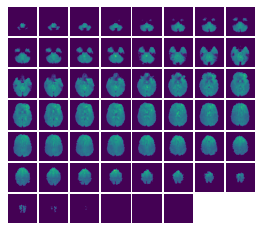

In [20]:
cortex.mosaic(brainData1.get_fdata().T[1,:,:,:]);

In [30]:
for i in range(0, 32):
    print(i ," ", ((int) ((i*.72 + 0.001)*100))/100)
    #print(i*.72)

0   0.0
1   0.72
2   1.44
3   2.16
4   2.88
5   3.6
6   4.32
7   5.04
8   5.76
9   6.48
10   7.2
11   7.92
12   8.64
13   9.36
14   10.08
15   10.8
16   11.52
17   12.24
18   12.96
19   13.68
20   14.4
21   15.12
22   15.84
23   16.56
24   17.28
25   18.0
26   18.72
27   19.44
28   20.16
29   20.88
30   21.6
31   22.32


In [ ]:
cols = [2, 4, 7]    

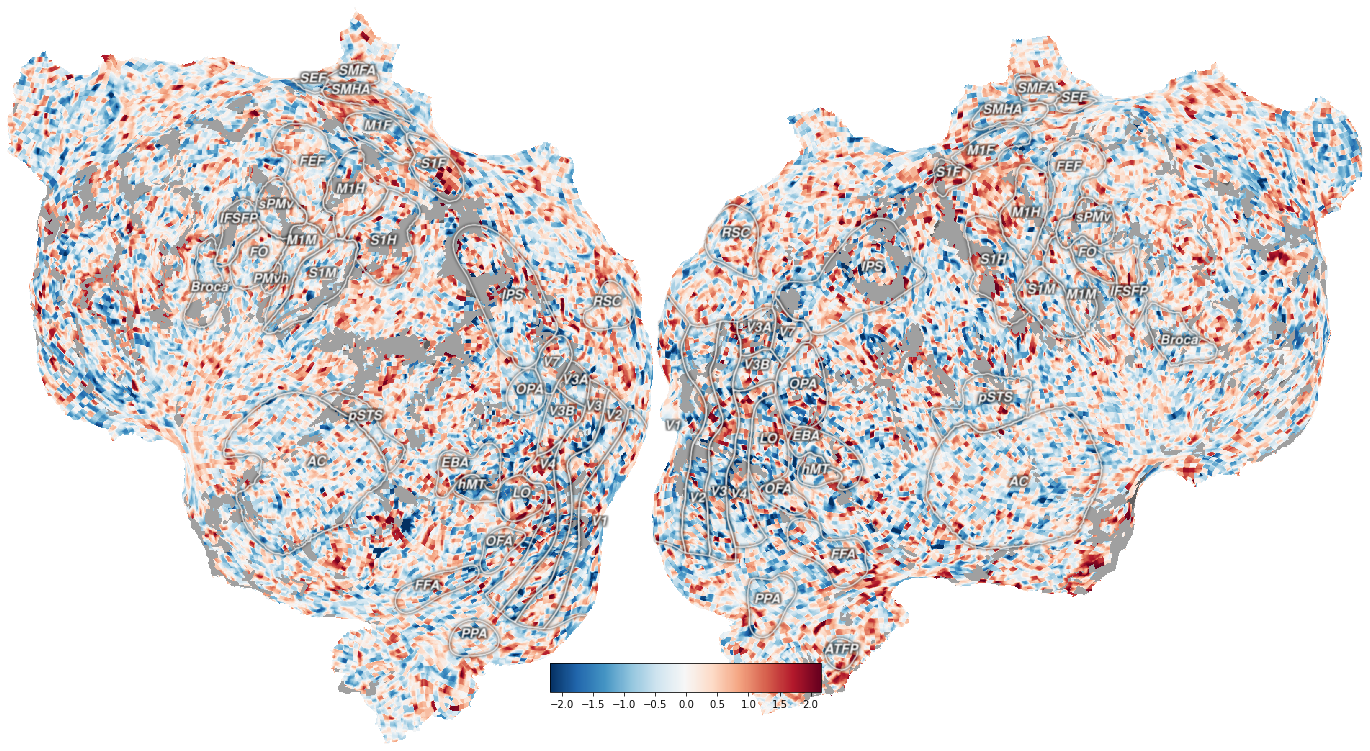

In [61]:
import cortex
cortex.quickshow(cortex.Volume(brainPersuasionSocial[0][0][0], "AHfs", "20180816AH-sg"), with_curvature=True);

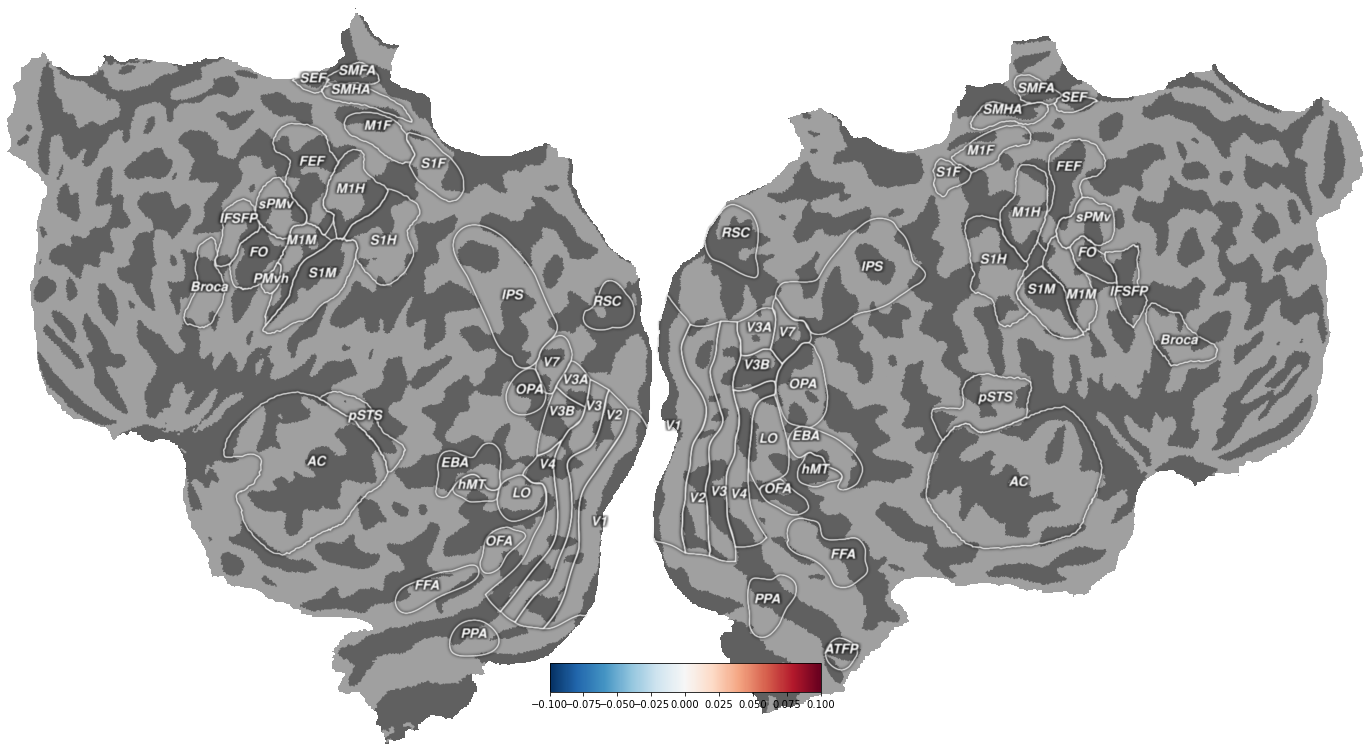

In [64]:

cortex.quickshow(cortex.Volume(np.zeros(brainPersuasionSocial[0][0][0].shape)*np.nan, "AHfs", "20180816AH-sg"), with_curvature=True);

In [66]:
ma.masked_invalid?